In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
df=pd.read_csv("/content/lin_reg_educ_share.csv")

In [4]:
df.head()

,Unnamed: 0,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715
0,Achham,0.461668,0.476151,0.080331,0.394979,0.224853,0.145161,0.099263,0.001059,0.050133,0.004221,6.322215,0.472,0.750000,1.166667
1,Arghakhanchi,0.433736,0.652446,0.039106,0.298637,0.253662,0.189621,0.157736,0.000844,0.057360,0.003033,5.179200,0.288,0.458333,1.020833
2,Baglung,0.438207,0.647397,0.043599,0.301124,0.239773,0.186960,0.154035,0.000375,0.070341,0.003793,5.378669,0.229,0.716667,1.083333
3,Baitadi,0.464469,0.548497,0.058514,0.346258,0.259600,0.186120,0.114269,0.000787,0.030814,0.003637,6.748073,0.457,1.133333,1.416667
4,Bajhang,0.477381,0.488333,0.073606,0.417432,0.219511,0.138940,0.112037,0.000483,0.034308,0.003682,6.945809,0.568,0.777778,1.583333


In [5]:
df.shape

(71, 15)

In [0]:
df.rename(columns={'Unnamed: 0':'district'},inplace=True)

In [7]:
df.head()

,district,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715
0,Achham,0.461668,0.476151,0.080331,0.394979,0.224853,0.145161,0.099263,0.001059,0.050133,0.004221,6.322215,0.472,0.750000,1.166667
1,Arghakhanchi,0.433736,0.652446,0.039106,0.298637,0.253662,0.189621,0.157736,0.000844,0.057360,0.003033,5.179200,0.288,0.458333,1.020833
2,Baglung,0.438207,0.647397,0.043599,0.301124,0.239773,0.186960,0.154035,0.000375,0.070341,0.003793,5.378669,0.229,0.716667,1.083333
3,Baitadi,0.464469,0.548497,0.058514,0.346258,0.259600,0.186120,0.114269,0.000787,0.030814,0.003637,6.748073,0.457,1.133333,1.416667
4,Bajhang,0.477381,0.488333,0.073606,0.417432,0.219511,0.138940,0.112037,0.000483,0.034308,0.003682,6.945809,0.568,0.777778,1.583333


Text(0.5, 1.0, 'Literacy Rate Vs Poverty Rate in different districts in Nepal')

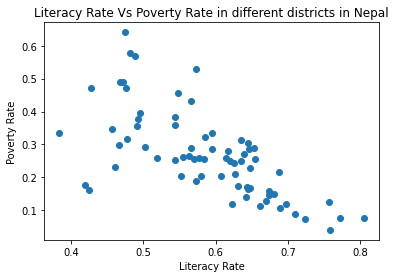

In [8]:
plt.scatter(df['literacy rate'],df['poverty rate'])
plt.xlabel("Literacy Rate")
plt.ylabel("Poverty Rate")
plt.title("Literacy Rate Vs Poverty Rate in different districts in Nepal")

In [9]:
df['literacy rate'].corr(df['poverty rate'],method='pearson')

-0.6798893910120695

In [10]:
df.tail()

,district,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715
66,Syangja,0.428499,0.696740,0.024426,0.233124,0.248407,0.250872,0.179026,0.000864,0.060832,0.002448,5.298789,0.118,0.535714,0.869048
67,Tanahu,0.437649,0.680704,0.035329,0.288172,0.265870,0.197444,0.146315,0.000844,0.061717,0.004310,5.192645,0.148,0.488095,1.107143
68,Taplejung,0.468741,0.639603,0.043544,0.314855,0.265353,0.196421,0.146136,0.000000,0.029723,0.003968,5.778622,0.270,1.166667,2.000000
69,Terhathum,0.463171,0.674394,0.024923,0.252844,0.243664,0.219448,0.211871,0.000688,0.045298,0.001265,5.536696,0.146,0.750000,1.541667
70,Udayapur,0.467240,0.614868,0.040798,0.290338,0.266224,0.183295,0.166718,0.000645,0.049024,0.002957,5.780472,0.259,0.791667,1.305556


In [0]:
df_2d=df[1:-1]

In [12]:
df_2d.shape

(69, 15)

In [0]:
model=LinearRegression()

In [14]:
model.fit(df_2d[['literacy rate']],df_2d[['poverty rate']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions=model.predict(df_2d[['literacy rate']])

In [16]:
df_2d['prediction']=predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_2d.head()

,district,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715,prediction
1,Arghakhanchi,0.433736,0.652446,0.039106,0.298637,0.253662,0.189621,0.157736,0.000844,0.057360,0.003033,5.179200,0.288,0.458333,1.020833,0.204699
2,Baglung,0.438207,0.647397,0.043599,0.301124,0.239773,0.186960,0.154035,0.000375,0.070341,0.003793,5.378669,0.229,0.716667,1.083333,0.209476
3,Baitadi,0.464469,0.548497,0.058514,0.346258,0.259600,0.186120,0.114269,0.000787,0.030814,0.003637,6.748073,0.457,1.133333,1.416667,0.303067
4,Bajhang,0.477381,0.488333,0.073606,0.417432,0.219511,0.138940,0.112037,0.000483,0.034308,0.003682,6.945809,0.568,0.777778,1.583333,0.360001
5,Bajura,0.485493,0.474538,0.093973,0.417503,0.233429,0.136786,0.093656,0.001517,0.019391,0.003744,6.564752,0.641,0.875000,1.166667,0.373055


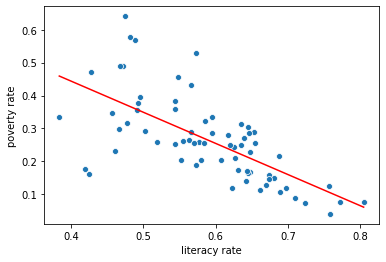

In [18]:
sns.lineplot(x='literacy rate', y='prediction',data=df_2d,color='red')
sns.scatterplot(x='literacy rate',y='poverty rate',data=df_2d)

In [19]:
b=model.intercept_[0]
print(b)
m=model.coef_[0][0]
print(m)

0.8221182820384326
-0.946315665100361


In [20]:
#poverty rate for aaccham
round(m*0.472+b,3	) 

0.375

In [21]:
#for udaypur
round(m*0.259+b,3)

0.577

In [0]:
#predict poverty rate given the household size,nkid06,nkid715,literacy rate
df_predict=df[['hhsize','literacy rate','nkid06','nkid715','district']]
df_y=df[['poverty rate']]

In [23]:
df_predict.shape

(71, 5)

In [26]:
df_predict.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_predict.isnull().any()

hhsize           False
literacy rate    False
nkid06           False
nkid715          False
district         False
dtype: bool

In [29]:
df_predict.drop(columns=['district'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
X_train,X_test,y_train,y_test=train_test_split(df_predict,df_y,test_size=0.20,random_state=42)


In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((56, 4), (15, 4), (56, 1), (15, 1))

In [0]:
model=LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions=model.predict(X_test)

In [0]:
df_compare=X_test.reset_index(drop=True)

In [0]:
df_compare['Actual']=y_test.values

In [0]:
df_compare['Predicted']=predictions
df_compare.drop(columns=['Prediction'],inplace=True)

In [45]:
df_compare.head()

,hhsize,literacy rate,nkid06,nkid715,Actual,Predicted
0,5.236356,0.654978,0.700000,1.083333,0.256,0.213130
1,6.322215,0.476151,0.750000,1.166667,0.472,0.297400
2,5.813340,0.584571,1.166667,1.812500,0.322,0.363464
3,6.945809,0.488333,0.777778,1.583333,0.568,0.328710
4,7.264983,0.631131,0.744444,1.283333,0.173,0.224538


In [46]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hhsize         15 non-null     float64
 1   literacy rate  15 non-null     float64
 2   nkid06         15 non-null     float64
 3   nkid715        15 non-null     float64
 4   Actual         15 non-null     float64
 5   Predicted      15 non-null     float64
dtypes: float64(6)
memory usage: 848.0 bytes


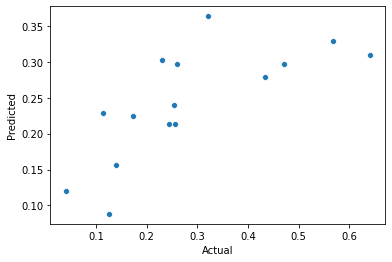

In [47]:
sns.scatterplot(x='Actual',y='Predicted',data=df_compare)

In [0]:
df_compare['Residuals']=df_compare['Actual']-df_compare['Predicted']

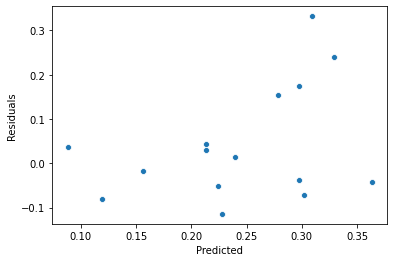

In [49]:
sns.scatterplot(x='Predicted',y='Residuals',data=df_compare)